## Check the data

In [16]:
from sklearn.datasets import fetch_20newsgroups
# Refer to the offcial document of scikit-learn for detailed usages:
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html
twenty_train = fetch_20newsgroups(subset='train', # choose which subset of the dataset to use; can be 'train', 'test', 'all'
                                  shuffle=True,
                                  random_state=42, # set the seed of random number generator when shuffling to make the outcome repeatable across different runs
#                                   remove=['headers'],
                                 )
twenty_test = fetch_20newsgroups(subset='test', shuffle=True, random_state=42)

In [18]:
print(type(twenty_train))
print(twenty_train.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR', 'description'])


In [19]:
twenty_train.filenames

array(['C:\\Users\\yxpegasus\\scikit_learn_data\\20news_home\\20news-bydate-train\\rec.autos\\102994',
       'C:\\Users\\yxpegasus\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.sys.mac.hardware\\51861',
       'C:\\Users\\yxpegasus\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.sys.mac.hardware\\51879',
       ...,
       'C:\\Users\\yxpegasus\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.sys.ibm.pc.hardware\\60695',
       'C:\\Users\\yxpegasus\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.graphics\\38319',
       'C:\\Users\\yxpegasus\\scikit_learn_data\\20news_home\\20news-bydate-train\\rec.motorcycles\\104440'],
      dtype='<U99')

In [29]:
twenty_train.target

array([7, 4, 4, ..., 3, 1, 8])

In [23]:
twenty_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [24]:
len(twenty_train.target_names)

20

In [28]:
# `twenty_train.target` only contains 0 and 1
import numpy as np
np.unique(twenty_train.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [40]:
print(twenty_train.description)
print(twenty_train.target[1])
print(twenty_train.data[1])

the 20 newsgroups by date dataset
4
From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.edu>



In [35]:
# The first document belongs to the category 'comp.sys.mac.hardware'
print(twenty_train.target_names[twenty_train.target[0]])

rec.autos


In [39]:
print(len(twenty_train.data))
print(len(twenty_train.target))

11314
11314


## Question 1:
To get started, plot a histogram of the number of training documents for each
of the 20 categories to check if they are evenly distributed.

In [42]:
len(twenty_train.target==1)

11314

In [46]:
num = [0]*20
lenth = len(twenty_train.target)
for i in range(0,lenth):
    num[twenty_train.target[i]]+=1
print(num)

[480, 584, 591, 590, 578, 593, 585, 594, 598, 597, 600, 595, 591, 594, 593, 599, 546, 564, 465, 377]


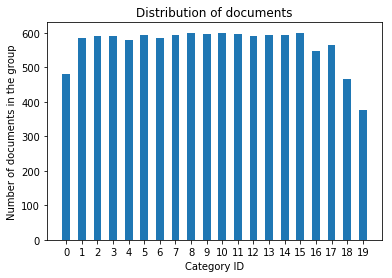

In [73]:
from matplotlib import pyplot as plt
t = range(0,20)
plt.bar(t,num,0.5)
plt.xticks(t,t)
plt.title("Distribution of documents")
plt.xlabel("Category ID")
plt.ylabel("Number of documents in the group")
plt.show()

## Question 2: 
Use the following specs to extract features from the textual data:
- Use the default stopwords of the CountVectorizer
- Exclude terms that are numbers (e.g. “123”, “-45”, “6.7” etc.) 
- Perform lemmatization with nltk.stem.wordnet.WordNetLemmatizer and pos_tag 
- Use min_df=3 

Report the shape of the TF-IDF matrices of the train and test subsets respectively

In [2]:
from sklearn.datasets import fetch_20newsgroups
categories = ['comp.graphics', 'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'rec.autos', 'rec.motorcycles',
'rec.sport.baseball', 'rec.sport.hockey']
train_dataset = fetch_20newsgroups(subset = 'train', categories = categories, shuffle = True, random_state = None)
test_dataset = fetch_20newsgroups(subset = 'test', categories = categories, shuffle = True, random_state = None)

In [11]:
import numpy as np
print(np.unique(train_dataset.target))
print(train_dataset.target_names)
print(len(train_dataset.target))
print(len(test_dataset.target))

[0 1 2 3 4 5 6 7]
['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
4732
3150


In [4]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=3,token_pattern=r'(?u)\b[a-zA-Z]{2,}\b') 
# ngram is n words together to be concidered as a phrase
# max_df = 1.0 means if the context only consists of the same word, then it will be eliminated.
# min_df = 3 (int) means if the context contains the word repeats less than 3 times, then it will be ignored.
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b[a-zA-Z]{2,}\\b',
        tokenizer=None, vocabulary=None)

In [5]:
 X_train = vectorizer.fit_transform(train_dataset.data)
print(X_train.shape)
print('-' * 20)
print(len(vectorizer.get_feature_names()))
print('-' * 20)
print(vectorizer.get_feature_names()) # not lemmatized

(4732, 16609)
--------------------
16609
--------------------
['aa', 'aaa', 'aamir', 'aardvark', 'aargh', 'aarghhhh', 'aarhus', 'aaron', 'aau', 'ab', 'abad', 'abandon', 'abate', 'abbot', 'abbott', 'abbreviation', 'abc', 'abd', 'abel', 'aber', 'aberystwyth', 'abiding', 'abilities', 'ability', 'able', 'abo', 'abominations', 'abort', 'abott', 'about', 'above', 'abs', 'absence', 'absent', 'absolute', 'absolutely', 'abstact', 'abstract', 'abstracts', 'absurd', 'absurdity', 'absurdum', 'abuse', 'abused', 'ac', 'acad', 'academic', 'academy', 'acadiau', 'acbl', 'acc', 'accel', 'accelerate', 'accelerated', 'accelerating', 'acceleration', 'accelerator', 'accelerators', 'accelleration', 'accellerator', 'accented', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepts', 'access', 'accessed', 'accesses', 'accessible', 'accessing', 'accessories', 'accessory', 'accident', 'accidental', 'accidentally', 'accidents', 'acclimated', 'accommodate', 'accomodate', 'accompanied', 'accomplish', 'accomplis

In [7]:
# Lemmatization
from nltk import pos_tag,word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet as wn

wnl = WordNetLemmatizer()
X_train = vectorizer.fit_transform(train_dataset.data)

# why 'ran' is considered to be NOUN in pos_tag?

# Here 2nd para of lemmatize doesn't support pos_tag. it should be transfered to wordnet.NOUN or ... to fit in

# Define a tag_trans to fit in pos in wnl.lemmatize(_,pos=_)

#The function is from Author: 
#Author：但盼风雨来_jc
#Link：https://www.jianshu.com/p/79255fe0c5b5
#Resource：简书
#简书著作权归作者所有，任何形式的转载都请联系作者获得授权并注明出处。

def tag_trans(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('V'):
        return wn.VERB
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    else:
        return 'n'

org_wordlist = vectorizer.get_feature_names()
#org_wordlist = ['I','loves','bunnies','her','she','running','ran']*3  #testset
new_wordlist = []
for word in org_wordlist:
    tag = pos_tag(word_tokenize(word))[0][1]
    pos = tag_trans(tag)
    new_word = wnl.lemmatize(word,pos)
    new_wordlist.append(new_word)

#a=tag_trans(pos_tag(word_tokenize('aaa'))[0][1])
#print(a)
#print(wnl.lemmatize('aaa',pos=a))
    
print(len(new_wordlist))
#print(new_wordlist)
print('-' * 20)

vec = CountVectorizer() # new vectorizer 
print(vec)
print('-' * 20)
base = vec.fit_transform(new_wordlist)
X_train = vec.transform(train_dataset.data)
print(X_train.shape)
print('-' * 20)
print(len(vec.get_feature_names()))
print('-' * 20)
print(vec.get_feature_names())

16609
--------------------
CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)
--------------------
(4732, 13698)
--------------------
13698
--------------------
['aa', 'aaa', 'aamir', 'aardvark', 'aargh', 'aarghhhh', 'aarhus', 'aaron', 'aau', 'ab', 'abad', 'abandon', 'abate', 'abbot', 'abbott', 'abbreviation', 'abc', 'abd', 'abel', 'aber', 'aberystwyth', 'abide', 'ability', 'able', 'abo', 'abomination', 'abort', 'abott', 'about', 'above', 'absence', 'absent', 'absolute', 'absolutely', 'abstact', 'abstract', 'absurd', 'absurdity', 'absurdum', 'abuse', 'ac', 'acad', 'academic', 'academy', 'acadiau', 'acbl', 'acc', 'accel', 'accelerate', 'acceleration', 'accelerator', 'a

In [13]:
# test data
X_test = vec.transform(test_dataset.data)
print(X_test.shape)
print(X_test)

(3150, 13698)
  (0, 28)	1
  (0, 29)	1
  (0, 96)	1
  (0, 166)	1
  (0, 194)	1
  (0, 312)	1
  (0, 343)	1
  (0, 381)	1
  (0, 411)	1
  (0, 427)	4
  (0, 487)	1
  (0, 624)	1
  (0, 693)	1
  (0, 778)	2
  (0, 786)	1
  (0, 970)	1
  (0, 1202)	1
  (0, 1317)	1
  (0, 1583)	1
  (0, 1589)	1
  (0, 1590)	1
  (0, 1714)	4
  (0, 1933)	1
  (0, 2249)	4
  (0, 2294)	1
  :	:
  (3149, 11973)	1
  (3149, 11980)	1
  (3149, 12011)	2
  (3149, 12023)	1
  (3149, 12026)	1
  (3149, 12032)	1
  (3149, 12103)	7
  (3149, 12211)	1
  (3149, 12364)	1
  (3149, 12374)	1
  (3149, 12567)	1
  (3149, 12622)	1
  (3149, 12628)	1
  (3149, 12662)	2
  (3149, 12701)	1
  (3149, 12829)	1
  (3149, 12835)	1
  (3149, 13087)	3
  (3149, 13171)	1
  (3149, 13176)	6
  (3149, 13204)	1
  (3149, 13291)	4
  (3149, 13362)	1
  (3149, 13394)	1
  (3149, 13555)	1


In [19]:
# TF-IDF matrices of the train subsets
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()

print(tfidf)
print('-' * 20)

X_train_tfidf = tfidf.fit_transform(X_train)
print(X_train_tfidf.shape)
print('-' * 20)
print(X_train.toarray()[:30,:30])
print('-' * 20)
print(X_train_tfidf.toarray()[:30,:30])

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)
--------------------
(4732, 13698)
--------------------
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [21]:
# TF-IDF matrices of the test subsets
X_test_tfidf = tfidf.transform(X_test)
print(X_test_tfidf.shape)
print('-' * 20)
print(X_test.toarray()[:30,:30])
print('-' * 20)
print(X_test_tfidf.toarray()[:30,:30])

(3150, 13698)
--------------------
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 